# <center><img src="Bolly.jpeg" width="2400" height="120" /></center>

<h1><center><strong>First-Day First-Show</strong></center></h1>

Background - Why do this?

The most aptly titled Hollywood movie (1945 Musical/Comedy) - "There's no business like show business," aptly encapsulates the point being made here.  Movie marketing is tremendous business.  As per an article filed by the Economic Times in May 2019, it alluded to INR 606 Cr. being spent on movie advertising in India in 2018.  That number has since grown.  Now with Covid 19 causing us to consider investments even more judiciously - it is critical to back the right movies which would make business sense.  However, all the investments in movie investments only help in building the opening weekend of the movie - the so called block buster.  The rest of the weeks are a function of the properties of the movie itself. Hence I will use data to understand which movies to back and predict (basis movie attributes) which of them are going to create a splash in the box office and which ones are going to sink without a trace.

# **Table of Contents**
1. [Setup](#Section1)<br><br>
2. [Importing Data-set](#Section2)<br><br>
3. [Preprocessing Dataset](#Section3)<br><br>
4. [EDA on Processed Data](#Section4)<br><br>
5. [Initial Model Building](#Section5)<br><br>
6. [Initial Model Performance and Predictor System](#Section6)<br><br>
7. [Fine-Tuning the Model](#Section7)<br><br>
8. [Conclusions & Future Development](#Section8)<br><br>

<a id = Section1></a>
### **1. Set-up**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns',200)
pd.set_option('max_rows', 200)

print('Setup done!')

Setup done!


<a id = Section2></a>
### **2. Importing Data-set**

In [2]:
movies = pd.read_csv('Movie.csv', index_col='Unnamed: 0')

In [3]:
movies.shape

(3989, 28)

In [4]:
movies.head()

,Actors 1,Actors 2,Actors 3,Actors 4,Actors 5,Actors 6,Actors 7,Budget,Dialogue,Director,Directors,First Day,First Week,First Weekend,Genre,India Gross,Lyrics,Music,Overseas Gross,Producer,Production Banner,Release Date,Runtime,Screenplay,Screens,Story,Title,Worldwide Gross
1,Rishi Kapoor,Sanjay Dutt,Hrithik Roshan,Priyanka Chopra,Om Puri,Zarina Wahab,Sachin Khedekar,"71,00,00,000","Karan Malhotra,Ila Bedi Dutta",Karan Malhotra,NaN,"21,72,00,000","81,37,00,000","45,74,00,000",Action,"1,63,98,00,000",Amitabh Bhattacharya,Ajay - Atul,"$6,100,000","Karan Johar,Hiroo Johar",Dharma Productions Pvt. Ltd.,26-Jan-12,168 min,NaN,2600,Piyush Mishra,Agneepath,"1,94,32,75,000"
2,Pulkit Samrat,Amita Pathak,Rajesh Bakshi,NaN,NaN,NaN,NaN,"10,00,00,000","Supavitra Babul,Gautam Mehra",Supavitra Babul,NaN,"38,00,000","1,95,50,000","1,28,00,000",Love Story,"2,72,00,000","Aseem Ahmed Abbasi,Luv Ranjan,Kumaar",Raghav Sachar,$---,"Abhishek Pathak,Kumar Mangat",Viacom 18 Motion Pictures,13-Apr-12,130 min,Supavitra Babul,675,Gautam Mehra,Bittoo Boss,"2,72,00,000"
3,Akshay Kumar,John Abraham,Rishi Kapoor,Randhir Kapoor,Mithun Chakraborty,Asin,Riteish Deshmukh,"72,00,00,000","Sajid Khan,Tushar Hiranandani",Sajid Khan,NaN,"12,19,00,000","61,75,00,000","40,24,00,000",Comedy,"1,53,76,00,000",Sameer,Sajid - Wajid,"$6,760,000",Sajid Nadiadwala,Eros International,06-Apr-12,156 min,Sajid Nadiadwala,2650,Farhad - Sajid,Housefull 2,"1,88,40,50,000"
4,Ajay Devgn,Kajal Aggarwal,Prakash Raj,Sonali Kulkarni,Sudhanshu Pandey,Sachin Khedekar,Ashok Saraf,"41,00,00,000",Yunus Sajawal,Rohit Shetty,NaN,"8,76,00,000","49,29,00,000","29,73,00,000",Action,"1,35,83,00,000",Swanand Kirkire,Ajay - Atul,"$1,230,000",NaN,Reliance Entertainment,22-Jul-11,144 min,Hari,2050,Farhad - Sajid,Singham,"1,41,30,35,000"
5,Mithun Chakraborty,Ajay Devgn,Kareena Kapoor,Arshad Warsi,Tusshar Kapoor,Shreyas Talpade,Kunal Khemu,"50,00,00,000",Yunus Sajawal,Rohit Shetty,NaN,"8,36,00,000","62,61,00,000","34,85,00,000",Comedy,"1,49,12,00,000",Kumaar,Pritam,"$4,620,000",Dillion Mehta,Shree Ashtavinayak Cinevision Ltd.,05-Nov-10,141 min,Yunus Sajawal,1750,Farhad - Sajid,Golmaal 3,"1,69,56,35,000"


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 1 to 3991
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Actors 1           3957 non-null   object
 1   Actors 2           3241 non-null   object
 2   Actors 3           3148 non-null   object
 3   Actors 4           3060 non-null   object
 4   Actors 5           2873 non-null   object
 5   Actors 6           2685 non-null   object
 6   Actors 7           2352 non-null   object
 7   Budget             3989 non-null   object
 8   Dialogue           3743 non-null   object
 9   Director           3937 non-null   object
 10  Directors          7 non-null      object
 11  First Day          3989 non-null   object
 12  First Week         3989 non-null   object
 13  First Weekend      3989 non-null   object
 14  Genre              3950 non-null   object
 15  India Gross        3989 non-null   object
 16  Lyrics             3413 non-null   object


- Apparently there are lots of NaNs - need to remove the same before proceeding further

<a id = Section3></a>
### **3. Preprocessing dataset**

In [6]:
movies_percent = movies.isnull().sum()/movies.isnull().count()*100
movies_percent = pd.DataFrame(movies_percent, columns =['Percent_Null'])
movies_actual = movies.isnull().sum()
movies_percent['Actual_Null'] = movies_actual 
print(movies_percent)

                   Percent_Null  Actual_Null
Actors 1               0.802206           32
Actors 2              18.751567          748
Actors 3              21.082978          841
Actors 4              23.289045          929
Actors 5              27.976937         1116
Actors 6              32.689897         1304
Actors 7              41.037854         1637
Budget                 0.000000            0
Dialogue               6.166959          246
Director               1.303585           52
Directors             99.824517         3982
First Day              0.000000            0
First Week             0.000000            0
First Weekend          0.000000            0
Genre                  0.977689           39
India Gross            0.000000            0
Lyrics                14.439709          576
Music                  4.512409          180
Overseas Gross         0.000000            0
Producer               9.074956          362
Production Banner      0.225620            9
Release Da

In [7]:
#lets drop the irelevant columns which have null figures
# Hence selecting actors 5,6,7
revised_movies = movies.drop(['Actors 4','Actors 5','Actors 6','Actors 7','Directors', 'Story', 
                              'Screenplay','Producer', 'Lyrics'], axis = 1)

In [8]:
#checking the column names
revised_movies.columns

Index(['Actors 1', 'Actors 2', 'Actors 3', 'Budget', 'Dialogue', 'Director',
       'First Day', 'First Week', 'First Weekend', 'Genre', 'India Gross',
       'Music', 'Overseas Gross', 'Production Banner', 'Release Date',
       'Runtime', 'Screens', 'Title', 'Worldwide Gross'],
      dtype='object')

In [9]:
#rechecking revised_movies for NaNs
print(revised_movies.shape)
revised_movies.isnull().sum()

(3989, 19)


Actors 1              32
Actors 2             748
Actors 3             841
Budget                 0
Dialogue             246
Director              52
First Day              0
First Week             0
First Weekend          0
Genre                 39
India Gross            0
Music                180
Overseas Gross         0
Production Banner      9
Release Date           0
Runtime                0
Screens                0
Title                  0
Worldwide Gross        0
dtype: int64

In [10]:
#lets check for a few columns and understand the NaNs in the column (no need to run the code below in sequence)
#revised_movies[pd.isnull(revised_movies['Producer'])]

In [11]:
movies_reduced = revised_movies.dropna()

In [12]:
print('Original Dataset had ', movies.shape)
print('Dropping Null has', movies_reduced.shape)

Original Dataset had  (3989, 28)
Dropping Null has (2921, 19)


In [13]:
#checking for null data in columns now:

movies_reduced.isnull().sum()

Actors 1             0
Actors 2             0
Actors 3             0
Budget               0
Dialogue             0
Director             0
First Day            0
First Week           0
First Weekend        0
Genre                0
India Gross          0
Music                0
Overseas Gross       0
Production Banner    0
Release Date         0
Runtime              0
Screens              0
Title                0
Worldwide Gross      0
dtype: int64

No NaNs in dataset.  However need to convert data to the correct data type.

In [14]:
movies_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 1 to 3987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Actors 1           2921 non-null   object
 1   Actors 2           2921 non-null   object
 2   Actors 3           2921 non-null   object
 3   Budget             2921 non-null   object
 4   Dialogue           2921 non-null   object
 5   Director           2921 non-null   object
 6   First Day          2921 non-null   object
 7   First Week         2921 non-null   object
 8   First Weekend      2921 non-null   object
 9   Genre              2921 non-null   object
 10  India Gross        2921 non-null   object
 11  Music              2921 non-null   object
 12  Overseas Gross     2921 non-null   object
 13  Production Banner  2921 non-null   object
 14  Release Date       2921 non-null   object
 15  Runtime            2921 non-null   object
 16  Screens            2921 non-null   int64 


Now to convert multiple object data coluns to integers and date
Key columns to be converted include:
- Budget
- First Day
- First Week
- First Weekend
- India Gross
- Overseas Gross
- Runtime
- Worldwide Gross

Can also convert Release Date to_datetime as well.

In [15]:
# used this in conjunction with next code-set to understand issues with the movies_reduced2 data
#movies_reduced2['Overseas Gross'].nunique

In [16]:
#creating movies_reduced2 which is a deep copy of movies_reduced - not affecting the original dataframe
movies_reduced2 = movies_reduced.copy(deep = True)

#also preparing function to convert object columns to integers
def number(df,col):
    df[col]= df[col].str.replace(',','').str.replace("$",'').str.replace("$---",'0').str.replace('min','').str.replace('--','0')
    df[col] = df[col].astype('int64')

#selected columns which need to be cleaned
cols = ['Budget','First Day','First Week','First Weekend', 'India Gross', 'Runtime', 'Worldwide Gross']

#using the function created above for iterating through the columns
for col in cols:
    number(movies_reduced2,col)

In [17]:
#converting date to_datetime

movies_reduced2['Release Date'] = pd.to_datetime(movies_reduced2['Release Date'])

In [18]:
#checking whether all necessary columnns have been converted
movies_reduced2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 1 to 3987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Actors 1           2921 non-null   object        
 1   Actors 2           2921 non-null   object        
 2   Actors 3           2921 non-null   object        
 3   Budget             2921 non-null   int64         
 4   Dialogue           2921 non-null   object        
 5   Director           2921 non-null   object        
 6   First Day          2921 non-null   int64         
 7   First Week         2921 non-null   int64         
 8   First Weekend      2921 non-null   int64         
 9   Genre              2921 non-null   object        
 10  India Gross        2921 non-null   int64         
 11  Music              2921 non-null   object        
 12  Overseas Gross     2921 non-null   object        
 13  Production Banner  2921 non-null   object        
 14  Release 

<a id = Section4></a>
### **4. EDA on Processed Data**

In [19]:
movies_reduced2.describe(include = 'all')

,Actors 1,Actors 2,Actors 3,Budget,Dialogue,Director,First Day,First Week,First Weekend,Genre,India Gross,Music,Overseas Gross,Production Banner,Release Date,Runtime,Screens,Title,Worldwide Gross
count,2921,2921,2921,2.921000e+03,2921,2921,2.921000e+03,2.921000e+03,2.921000e+03,2921,2.921000e+03,2921,2921,2921,2921,2921.000000,2921.000000,2921,2.921000e+03
unique,1016,1342,1418,NaN,1848,1479,NaN,NaN,NaN,13,NaN,1262,469,1642,1286,NaN,NaN,2898,NaN
top,Mithun Chakraborty,Suneil Shetty,Anupam Kher,NaN,Anwar Khan,David Dhawan,NaN,NaN,NaN,Drama,NaN,Anu Malik,$---,Eros International,2016-09-23 00:00:00,NaN,NaN,Game,NaN
freq,86,31,41,NaN,38,33,NaN,NaN,NaN,1131,NaN,145,1506,75,9,NaN,NaN,3,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-11-20 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-21 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.084173e+08,NaN,NaN,1.319758e+07,6.888368e+07,4.214932e+07,NaN,1.448405e+08,NaN,NaN,NaN,NaN,131.452242,412.889079,NaN,1.779095e+08
std,NaN,NaN,NaN,2.133897e+08,NaN,NaN,3.649084e+07,1.870477e+08,1.114883e+08,NaN,3.924819e+08,NaN,NaN,NaN,NaN,25.792876,681.521596,NaN,5.099802e+08
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000e+00
25%,NaN,NaN,NaN,8.500000e+06,NaN,NaN,1.150000e+05,7.500000e+05,3.500000e+05,NaN,1.200000e+06,NaN,NaN,NaN,NaN,118.000000,35.000000,NaN,1.400000e+06


In [20]:
movies_reduced2.columns

Index(['Actors 1', 'Actors 2', 'Actors 3', 'Budget', 'Dialogue', 'Director',
       'First Day', 'First Week', 'First Weekend', 'Genre', 'India Gross',
       'Music', 'Overseas Gross', 'Production Banner', 'Release Date',
       'Runtime', 'Screens', 'Title', 'Worldwide Gross'],
      dtype='object')

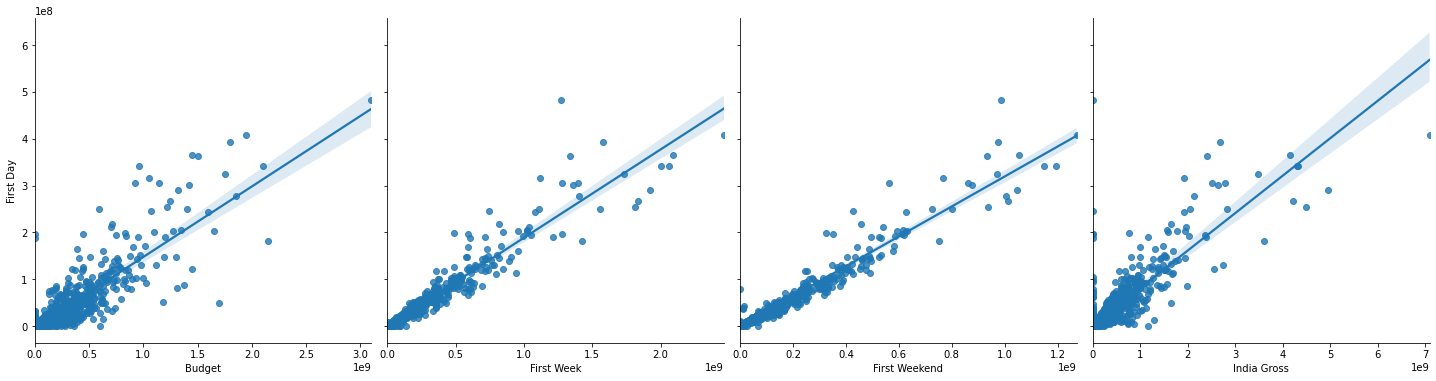

In [21]:
#checking on coorelation with monies to then identify which money column to keep

sns.pairplot(movies_reduced2, x_vars = ['Budget','First Week', 'First Weekend', 'India Gross'], y_vars ='First Day',
            height = 5, aspect = 1, kind = 'reg');

Interestingly we can see some very clear action points, namely:
- There is correlation between the First Day collections with
    - Movie Budget
    - First Week opening
    - First Weekend &
    - India Gross of the movie.
- Clearly we can drop the First Week First, First Weekend & India Gross and focus entirely on the dependent variable
- Also we notice a critical point that there are multiple outliers to the data which can skew predictions

In [22]:
# creating another data frame copy to progress further
movies_reduced3 = movies_reduced2.copy(deep = True)

#dropping the unnecessary columns
cols = ['First Week', 'First Weekend', 'India Gross', 'Title', 'Overseas Gross' ,'Worldwide Gross']
movies_reduced3.drop(cols, axis = 1, inplace=True)

#checking on whether the actions have been performed
movies_reduced3.columns

Index(['Actors 1', 'Actors 2', 'Actors 3', 'Budget', 'Dialogue', 'Director',
       'First Day', 'Genre', 'Music', 'Production Banner', 'Release Date',
       'Runtime', 'Screens'],
      dtype='object')

In [23]:
#taking an indepth look at the data in each of the columns before proceeding for machine learning

from pandas_profiling import ProfileReport
ProfileReport(movies_reduced3).to_file('Movie3.html')

Observations from pandas_profiling of the dataset
- Multiple scenarios with 0 as the data for
    - Budget
    - First Day
    - Runtime
    - Screens
All data points with 0 value need to be removed.

In [24]:
movies_reduced4 = movies_reduced3[(movies_reduced3 != 0).all(1)]

In [25]:
print(movies_reduced4.shape)
print(movies_reduced3.shape)

(2221, 13)
(2921, 13)


Lost an additional 700 rows worth of data

In [26]:
movies_reduced4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221 entries, 1 to 3957
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Actors 1           2221 non-null   object        
 1   Actors 2           2221 non-null   object        
 2   Actors 3           2221 non-null   object        
 3   Budget             2221 non-null   int64         
 4   Dialogue           2221 non-null   object        
 5   Director           2221 non-null   object        
 6   First Day          2221 non-null   int64         
 7   Genre              2221 non-null   object        
 8   Music              2221 non-null   object        
 9   Production Banner  2221 non-null   object        
 10  Release Date       2221 non-null   datetime64[ns]
 11  Runtime            2221 non-null   int64         
 12  Screens            2221 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 242.9+ 

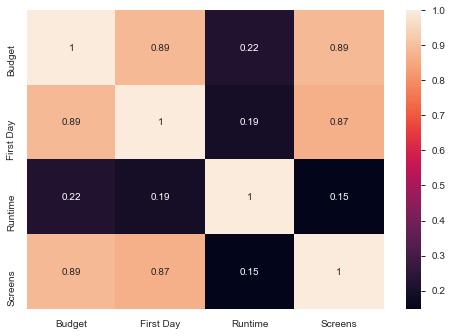

In [27]:
sns.heatmap(movies_reduced4.corr(), annot=True);

Looking at the correlation matrix
- Budget and First day is correlated
- Runtime has low correlation with any of the factors

Consider dropping runtime as it does not affect the First Day box office numbers

In [28]:
movies_reduced4 = movies_reduced4.drop(['Runtime'], axis = 1)

In [29]:
#re-running the profiling report on movies_reduced4
ProfileReport(movies_reduced4).to_file('Movie4.html')

<a id = Section5></a>
### **5. Initial Model Building**

In [30]:
#getting movies_reduced4 ready for machine learning

movies_reduced4.columns

Index(['Actors 1', 'Actors 2', 'Actors 3', 'Budget', 'Dialogue', 'Director',
       'First Day', 'Genre', 'Music', 'Production Banner', 'Release Date',
       'Screens'],
      dtype='object')

In [31]:
#using one-hot encoding through get_dummies and random forest regressor

cols = ['Actors 1', 'Actors 2', 'Actors 3', 'Dialogue', 'Director', 'Genre', 'Music', 'Production Banner']

movies_dummies= pd.get_dummies(data = movies_reduced4, columns = cols)

movies_dummies.drop('Release Date', axis = 1, inplace = True)

movies_dummies.shape
movies_dummies.head()

,Budget,First Day,Screens,Actors 1_Aadar Jain,Actors 1_Aamir Ali Malik,Actors 1_Aamir Bashir,Actors 1_Aamir Khan,Actors 1_Aaryan,Actors 1_Aasad Mirza,Actors 1_Aashish Chanana,Actors 1_Aashish Chaudhary,Actors 1_Abhay Deol,Actors 1_Abhijeet Sawant,Actors 1_Abhinav Shukla,Actors 1_Abhishek Anand,Actors 1_Abhishek Bachchan,Actors 1_Abhishek Kapoor,Actors 1_Abhishek Urade,Actors 1_Adah Sharma,Actors 1_Adhvik Mahajan,Actors 1_Adhyayan Suman,Actors 1_Adil Hussain,Actors 1_Aditi Inamdar,Actors 1_Aditya Narayan,Actors 1_Aditya Om,Actors 1_Aditya Pancholi,Actors 1_Aditya Roy Kapoor,Actors 1_Aditya Samanta,Actors 1_Aditya Shrivastava,Actors 1_Aftab Shivdasani,Actors 1_Ahsaas Channa,Actors 1_Aishwarya Rai,Actors 1_Ajay Devgn,Actors 1_Ajay Jadeja,Actors 1_Ajay Shukla,Actors 1_Ajay Sinh Rathod,Actors 1_Ajaz Khan,Actors 1_Ajinkya Deo,Actors 1_Akanksha Malhotra,Actors 1_Akanksha Puri,Actors 1_Akash,Actors 1_Akbar Khan,Actors 1_Akshay Kapoor,Actors 1_Akshay Kumar,Actors 1_Akshay Oberoi,Actors 1_Akshaye Khanna,Actors 1_Aksshat,Actors 1_Ali Fazal,Actors 1_Ali Zafar,Actors 1_Alia Bhatt,Actors 1_Alma Grey,Actors 1_Aman Verma,Actors 1_Amar Upadhyay,Actors 1_Amarjeet,Actors 1_Ameesha Patel,Actors 1_Amit Hotchandani,Actors 1_Amit Purohit,Actors 1_Amit Riyaan,Actors 1_Amita Pathak,Actors 1_Amitabh Bachchan,Actors 1_Ammtoje Mann,Actors 1_Amrita Singh,Actors 1_Anand Tiwari,Actors 1_Anay,Actors 1_Anil Kapoor,Actors 1_Anjala Zaveri,Actors 1_Ankita Shrivastava,Actors 1_Ankur Khanna,Actors 1_Ankush Choudhary,Actors 1_Antara Mali,Actors 1_Anu Kapoor,Actors 1_Anubhav Anand,Actors 1_Anuj Pandit,Actors 1_Anuj Sawhney,Actors 1_Anuj Saxena,Actors 1_Anupam Kher,Actors 1_Anushka Sharma,Actors 1_Apoorva Agnihotri,Actors 1_Arayan Singh,Actors 1_Arbaaz Khan,Actors 1_Arif Zakaria,Actors 1_Arjan Bajwa,Actors 1_Arjun Kapoor,Actors 1_Arjun Punj,Actors 1_Arjun Rampal,Actors 1_Armaan Jain,Actors 1_Arsh Deol,Actors 1_Arshad Warsi,Actors 1_Arunoday Singh,Actors 1_Arvind Swamy,Actors 1_Arya Babbar,Actors 1_Aryan Singh,Actors 1_Aryan Vaid,Actors 1_Aryeman Ramsay,Actors 1_Aseem Ali Khan,Actors 1_Asha Bhonsle,Actors 1_Ashima Sharma,Actors 1_Ashmit Patel,Actors 1_Ashok Kumar,Actors 1_Ashraf Khan,...,Production Banner_Tourbo Infotech & Industries Ltd,Production Banner_Tricolor Creations,Production Banner_Tricolour Productions Pvt. Ltd.,Production Banner_Tridev Arts,Production Banner_Tridev Film Associates,Production Banner_Trigno Media,Production Banner_Trimurti Films Pvt. Ltd.,Production Banner_Trio Cafe Pvt. Ltd.,Production Banner_Triple Aar Movies,Production Banner_Trishakti Films,Production Banner_Tristar International,Production Banner_Triumph Talkies,Production Banner_True Dreams Production,Production Banner_True Life Production,Production Banner_Tulip Films Ltd.,Production Banner_Turtle On A Hammock Films,Production Banner_Tutu Films Pvt. Ltd.,Production Banner_Twilight Entertainment Pvt. Ltd.,Production Banner_Tyagi Motion Pictures,Production Banner_UTV Motion Pictures,Production Banner_UV News Media & Communication Ltd.,Production Banner_Uberoi Line Productions,Production Banner_Udbhav Dreamzone,Production Banner_Ultra Distributors Pvt. Ltd.,Production Banner_Uma Productions,Production Banner_Unilux Films,Production Banner_United Color Entertainment Pvt. Ltd.,Production Banner_United Dreams Entertainment,Production Banner_United Seven Entertainment Ltd.,Production Banner_Upendra Films,Production Banner_Uppal Films Entertainment,Production Banner_Ushakiron Movies,Production Banner_Utsav Inc.,Production Banner_V.R. Enterprises Pvt. Ltd.,Production Banner_V.R. Pictures,Production Banner_Vainteya Films,Production Banner_Valiant Films Entertainment Pvt. Ltd.,Production Banner_Vandal Movies,Production Banner_Vasaani Films Combine,Production Banner_Vasudha Films,Production Banner_Vee Creations,Production Banner_Veetrag Film Legends Pvt. Ltd.,Production Banner_Venus Records & Tapes Pvt. Ltd.,Production Banner_Vertika Films,Production Banner_Very Fishy Films,Production Banner_Viac

In [32]:
#building a random forest model

X = movies_dummies.drop('First Day', axis = 1)
y = movies_dummies['First Day']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1776, 6955)
(1776,)
(445, 6955)
(445,)


In [33]:
# considering Random Forest for fit

from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
#predicting on training set

y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr = rfr.predict(X_test)

from sklearn import metrics

mae_rfr_train = metrics.mean_absolute_error(y_train,y_pred_train_rfr)
print('The mean absolute error on the training set is ', mae_rfr_train)


mae_rfr_test = metrics.mean_absolute_error(y_test,y_pred_test_rfr)
print('The mean absolute error on the test set is ', mae_rfr_test)

The mean absolute error on the training set is  2262948.606418919
The mean absolute error on the test set is  5079041.06741573


Now exploring with methodology 2, using label encoder.

In [35]:
# using label encoder using a different encoding strategy


from sklearn import preprocessing

le = preprocessing.LabelEncoder()
movies_le = movies_reduced4.apply(le.fit_transform)

In [36]:
movies_le.head()

,Actors 1,Actors 2,Actors 3,Budget,Dialogue,Director,First Day,Genre,Music,Production Banner,Release Date,Screens
1,440,679,302,146,483,421,561,0,33,272,855,132
2,368,51,641,81,1193,922,103,7,540,1073,866,87
3,40,297,690,147,971,757,525,3,615,311,865,133
4,29,304,588,116,1339,726,485,0,33,800,825,121
5,298,25,374,125,1339,726,476,3,517,911,789,115


Clearly this method is introducing ordered relationships between the Cardinal data points- and would not give accurate results.  Hence moving towards another system for encodng.

In [37]:
#using one hot encoder

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X = movies_reduced4.drop(['First Day', 'Release Date'], axis = 1)
y = movies_reduced4['First Day']
enc.fit(X)

OneHotEncoder()

In [38]:
#enc.categories_     #use this to get the categories of all the data
le = enc.transform(X).toarray()    #converting the labeled data to an array
print(X.shape)
print(le.shape)
print(y.shape)

(2221, 10)
(2221, 7327)
(2221,)


In [39]:
#attempt to inverse transform the data
inv_tr = enc.inverse_transform(le)
inv_tr

array([['Rishi Kapoor', 'Sanjay Dutt', 'Hrithik Roshan', ...,
        'Ajay - Atul', 'Dharma Productions Pvt. Ltd.', 2600],
       ['Pulkit Samrat', 'Amita Pathak', 'Rajesh Bakshi', ...,
        'Raghav Sachar', 'Viacom 18 Motion Pictures', 675],
       ['Akshay Kumar', 'John Abraham', 'Rishi Kapoor', ...,
        'Sajid - Wajid', 'Eros International', 2650],
       ...,
       ['Arjun Kapoor', 'Parineeti Chopra', 'Aditya Seal', ...,
        'Mannan Shaah,Rishi Rich,Baadshah',
        'Blockbuster Movie Entertainers', 2100],
       ['Saif Ali Khan', 'Chitrangda Singh', 'Radhika Apte', ...,
        'Tanishk,Bilal Saeed,Kanika Kapoor,Honey Singh,Sohail Sen',
        'B4U Entertainment', 1250],
       ['Amitabh Bachchan', 'Aamir Khan', 'Katrina Kaif', ...,
        'Ajay - Atul', 'Yash Raj Films', 4700]], dtype=object)

In [40]:
#splitting data to le and y

X_train,X_test,y_train,y_test = train_test_split(le,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1776, 7327)
(1776,)
(445, 7327)
(445,)


In [41]:
#applying random forest regressor

rfr1= RandomForestRegressor(n_jobs= -1)
rfr1.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

<a id = Section6></a>
### **6. Initial Model Performance and Predictor System**

In [42]:
#predicting on training set

y_pred_train_rfr1 = rfr1.predict(X_train)
y_pred_test_rfr1 = rfr1.predict(X_test)

from sklearn import metrics
mae_rfr1_train = metrics.mean_absolute_error(y_train,y_pred_train_rfr1)
print('The mean absolute error on the training set for rfr1 is ', mae_rfr1_train)
mae_rfr1_test = metrics.mean_absolute_error(y_test,y_pred_test_rfr)
print('The mean absolute error on the test set  for rfr1 is ', mae_rfr1_test)

mse_rfr1_train = metrics.mean_squared_error(y_train, y_pred_train_rfr1)
print('\n The Mean Squared error in the training set for rfr1 is', mse_rfr1_train)

mse_rfr1_test =metrics.mean_squared_error(y_test,y_pred_test_rfr1)
print('The Mean Squared error in the test set for rfr1 is', mse_rfr1_test)


r2_rfr1_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_rfr1))
print('\n The R Squared error in the training set for rfr 1 is', r2_rfr1_train)

r2_rfr1_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rfr1))
print('\n The R Squared error on the test set for model rfr1 is ', r2_rfr1_test)

The mean absolute error on the training set for rfr1 is  4011714.695945946
The mean absolute error on the test set  for rfr1 is  5079041.06741573

 The Mean Squared error in the training set for rfr1 is 169541789746138.1
The Mean Squared error in the test set for rfr1 is 917558400049382.0

 The R Squared error in the training set for rfr 1 is 13020821.392912894

 The R Squared error on the test set for model rfr1 is  30291226.453370653


In [43]:
#'Actors 1', 'Actors 2', 'Actors 3', 'Budget', 'Dialogue', 'Director', 'First Day', 'Genre', 'Music', 
#'Production Banner', 'Release Date', 'Screens'

#X & y split has been done from movies_reduced4

print('This will predict the First Day opening gross in INR for the movie')

print(sorted(movies_reduced4['Actors 1'].unique()))
act1 = input('From list, Lead Actor--->')
print(sorted(movies_reduced4['Actors 2'].unique()))
act2 = input('From list, Supporting Actor--->')
print(sorted(movies_reduced4['Actors 3'].unique()))
act3 = input('From list, Other Main Actor--->')
print('Max budget in data is ',movies_reduced4['Budget'].max(), '& Min budget in data is ',
      movies_reduced4['Budget'].min())
bud = int(input('Movie Budget in INR--->'))
print(sorted(movies_reduced4['Dialogue'].unique()))
dia = input('From list, Dialogue writer---> ')
print(sorted(movies_reduced4['Director'].unique()))
director = input('From list, Director --->')
print(sorted(movies_reduced4['Genre'].unique()))
gen = input('From list, Movie Genre--->')
print(sorted(movies_reduced4['Music'].unique()))
mus = input('From list, Music Director--->')
print(sorted(movies_reduced4['Production Banner'].unique()))
prod  = input('From list, Poduction Banner--->')
print('Max is screens employed is: ',movies_reduced4['Screens'].max(), 
      '& Min screens employed is: ', movies_reduced4['Screens'].min())
screens = int(input('Opening number of screens for movie--->'))

#combining all the data into a single array
X_new = [[act1, act2, act3, bud, dia, director, gen, mus, prod, screens]]

le_new = enc.transform(X_new).toarray() #transforming data basis earlier encoding

y_new = rfr1.predict(le_new)

print('As per Random Forest Regressor1 model the opening day box office collection would be:  INR ', y_new[0])

#col = ['Actors 1', 'Actors 2', 'Actors 3', 'Budget', 
#'Dialogue', 'Director', 'First Day', 'Genre', 'Music','Production Banner', 'Release Date', 'Screens']

#for col in movies_reduced4.columns:
#    print(sorted(movies_reduced4[col].unique()))
#    for n in len.movi

This will predict the First Day opening gross in INR for the movie
['Aadar Jain', 'Aamir Ali Malik', 'Aamir Bashir', 'Aamir Khan', 'Aaryan', 'Aasad Mirza', 'Aashish Chanana', 'Aashish Chaudhary', 'Abhay Deol', 'Abhijeet Sawant', 'Abhinav Shukla', 'Abhishek Anand', 'Abhishek Bachchan', 'Abhishek Kapoor', 'Abhishek Urade', 'Adah Sharma', 'Adhvik Mahajan', 'Adhyayan Suman', 'Adil Hussain', 'Aditi Inamdar', 'Aditya Narayan', 'Aditya Om', 'Aditya Pancholi', 'Aditya Roy Kapoor', 'Aditya Samanta', 'Aditya Shrivastava', 'Aftab Shivdasani', 'Ahsaas Channa', 'Aishwarya Rai', 'Ajay Devgn', 'Ajay Jadeja', 'Ajay Shukla', 'Ajay Sinh Rathod', 'Ajaz Khan', 'Ajinkya Deo', 'Akanksha Malhotra', 'Akanksha Puri', 'Akash', 'Akbar Khan', 'Akshay Kapoor', 'Akshay Kumar', 'Akshay Oberoi', 'Akshaye Khanna', 'Aksshat', 'Ali Fazal', 'Ali Zafar', 'Alia Bhatt', 'Alma Grey', 'Aman Verma', 'Amar Upadhyay', 'Amarjeet', 'Ameesha Patel', 'Amit Hotchandani', 'Amit Purohit', 'Amit Riyaan', 'Amita Pathak', 'Amitabh Bachcha

From list, Lead Actor---> Shahrukh Khan


['Aahana Kumra', 'Aakansha Pundir', 'Aamir Bashir', 'Aamir Khan', 'Aamna Shroff', 'Aamnitu Chaudhari', 'Aarti Chhabria', 'Aashish Chaudhary', 'Aashney Shroff', 'Aashrita Agarwal', 'Abhay Deol', 'Abhimanyu Singh', 'Abhishek Bachchan', 'Abhishek Kapoor', 'Abhishek Kumar', 'Adah Sharma', 'Adil Hussain', 'Aditi Govitrikar', 'Aditi Rao Hydari', 'Aditya Pancholi', 'Aditya Seal', 'Aftab Shivdasani', 'Aham Sharma', 'Aishwarya Rai', 'Aishwarya Rajesh', 'Ajay Devgn', 'Ajay Naidu', 'Ajeet', 'Ajith Kumar', 'Akanksha Malhotra', 'Akash Chopra', 'Akhilendra Mishra', 'Akshay Bedi', 'Akshay Kapoor', 'Akshay Kumar', 'Akshay Oberoi', 'Akshay Verma', 'Akshaye Khanna', 'Aksshat Bhatia', 'Alekh Sangal', 'Ali Fazal', 'Ali Larter', 'Ali Zafar', 'Alia Bhatt', 'Alyy Khan', 'Amar Upadhyay', 'Ameesha Patel', 'Amin Gazi', 'Amit Khaladkar', 'Amit Rao', 'Amit Sadh', 'Amita Pathak', 'Amitabh Bachchan', 'Amrish Puri', 'Amrita Arora', 'Amrita Prakash', 'Amrita Puri', 'Amrita Rao', 'Amruta Khanvilkar', 'Amy Jackson', 'A

From list, Supporting Actor---> Varun Dhawan


['\r\r\n', 'A.K. Hangal', 'Aahana Kumra', 'Aakash Dahiya', 'Aakshi Khari', 'Aanaahad', 'Aarti Chhabria', 'Aarti Puri', 'Aashif Sheikh', 'Aashim Gulati', 'Aashish Chaudhary', 'Abhay Deol', 'Abhimanyu Singh', 'Abhishek Bachchan', 'Abhishek Saha', 'Abhishek Sethiya', 'Abhishek Sharma', 'Adah Sharma', 'Adhyayan Suman', 'Adil Hussain', 'Aditi Govitrikar', 'Aditi Rao Hydari', 'Aditya Bal', 'Aditya Lakhia', 'Aditya Pancholi', 'Aditya Raj Kapoor', 'Aditya Rajput', 'Aditya Roy Kapoor', 'Aditya Seal', 'Aditya Shrivastava', 'Adyasha', 'Aftab Shivdasani', 'Aham Sharma', 'Ahsaas Channa', 'Ahwaan', 'Aisha Sharma', 'Aishwarya Rai', 'Ajay Chaudhary', 'Ajay Devgn', 'Ajay Jadeja', 'Ajinkya Deo', 'Akash Khurana', 'Akhilendra Mishra', 'Akruti Kakkar', 'Akshara Hassan', 'Akshay Kumar', 'Akshaye Khanna', 'Aleeza', 'Alexander Gifford', 'Ali Fazal', 'Ali Zafar', 'Alia Bhatt', 'Alia Shah', 'Alka Badola Kaushal', 'Alok Nath', 'Alyy Khan', 'Aman Siddiqui', 'Aman Sondhi', 'Aman Verma', 'Amardeep Jha', 'Ameesha Pa

From list, Other Main Actor---> Kajol


Max budget in data is  3100000000 & Min budget in data is  1500000


Movie Budget in INR---> 1000000000


['A.K. Srivastava', 'A.R. Murugadoss', 'Aabhar Dadhich', 'Aadesh K. Arjun', 'Aaditya Datt', 'Aakash Kaushik,Amrit Sagar', 'Aakash Kaushik,Madhur Sharma', 'Aanand Goradiya,Swati Goradiya', 'Aaryan Saxena', 'Aash Karan Atal', 'Aatish Kapadia', 'Aatish Kapadia,Vipul Amrutlal Shah', 'Abbas Dalal,Hussain Dalal', 'Abbas Dalal,Hussain Dalal,Shaan Yadav', 'Abbas Tyrewala', 'Abbas Tyrewala,Shona Urvashi', 'Abhigyan Jha,Abhiyan Rajhans', 'Abhijat Joshi,Kamna Chandra', 'Abhijeet Deshpande,Abhay Krishna', 'Abhijeet Deshpande,Bejoy Nambiar', 'Abhijeet Deshpande,Sanjay Gupta,Sanjay Bhatia', 'Abhik Bhanu', 'Abhinav Kashyap,Rajeev Barnwal', 'Abhishek Bindal,Shekhar Kochgaven', 'Abhishek Dogra,Umashankar Singh', 'Abhishek Kapoor', 'Abhishek Kapoor,Pubali Chaudhuri,Supratik Sen,Chetan Bhagat', 'Abhishek Sharma', 'Abhishek Sharma,Sanyukta Chawla,Saiwyn Qadras', 'Abhro Banerjee,Yuki Ellias,Pallu Newatia,Rafeeq Ellias', 'Abrar Alvi', 'Achala Nagar', 'Adeeb Rais,Ashna Arya', 'Adi Irani,Ranjeev Verma,Shiva R

From list, Dialogue writer--->  Rumi Jaffery,Imtiaz Patel


['A. Chitransh', 'A. Jagannath', 'A. Muthu', 'A.L. Vijay', 'A.R. Murugadoss', 'Aaditya Datt', 'Aamir Khan', 'Aarif Sheikh', 'Aashish Chanana', 'Aatish Kapadia', 'Abbas - Mustan', 'Abbas - Mustan,Abbas - Mustan', 'Abbas Tyrewala', 'Abhigyan Jha,Abhiyan Rajhans', 'Abhik Bhanu', 'Abhinav Kashyap', 'Abhinay Deo', 'Abhishek Bindal', 'Abhishek Chaubey', 'Abhishek Dogra', 'Abhishek Kapoor', 'Abhishek Sharma', 'Abhishek Varman', 'Abu Akbar', 'Adeeb Rais', 'Adi Irani,Shiva Rindani', 'Aditya Chopra', 'Aditya Datt', 'Aditya Om', 'Advait Chandan', 'Aejaz Gulab', 'Afzal Ahmed', 'Afzal Khan', 'Ahathian', 'Ahishor Solomon', 'Ahmed Khan', 'Ahmed Siddiqui', 'Ajai Sinha', 'Ajay Bahl', 'Ajay Bhuyan', 'Ajay Chandhok', 'Ajay Devgn', 'Ajay Dixit', 'Ajay K. Pannanlal', 'Ajay Kanchan', 'Ajay Kashyap', 'Ajay Panesekar', 'Ajay Varma', 'Ajay Yadav', 'Ajit Pal Mangat', 'Ajmal Zaheer Ahmad', 'Akarsh Khurana', 'Akash Dixit', 'Akash Jain', 'Akash Pandey', 'Akashaditya Lama', 'Akashdeep', 'Akbar Khan', 'Akhilesh Jais

From list, Director ---> Rohit Shetty


['Action', 'Adult', 'Animation', 'Comedy', 'Devotional', 'Drama', 'Horror', 'Love Story', 'Masala', 'Mystery', 'Rom - Com', 'Sci Fi / Fantasy', 'Thriller']


From list, Movie Genre---> Comedy


['A.R. Rehman', 'A.R. Rehman,Anu Malik', 'A.R. Rehman,Himesh Reshammiya', 'A.R. Rehman,Mychael Danna', 'A.R. Rehman,Vikram Montrose,Rohan Gokhale,Rohan Pradhan', 'Aabfm', 'Aadesh Shrivastava', 'Aadesh Shrivastava,Anu Malik', 'Aadesh Shrivastava,Jatin - Lalit', 'Aadesh Shrivastava,Krishnamohan', 'Aadesh Shrivastava,Sanjeev - Darshan', 'Aadesh Shrivastava,Sukhwinder Singh,Sandeep Chowta', 'Aadesh Shrivastava,Uttam Singh', 'Aadesh Shrivastava,Wayne Sharpe', 'Abhijeet - Kuljeet', 'Abhijit Vaghani,Sudeep Banerjee,D. Sameer', 'Abhishek - Akshay,Anjana Ankur Singh,Sandeep Madhavan,Anupam Roy,Keegan Pinto', 'Abhishek Ray', 'Abid Shah', 'Abu Malik', 'Abu Zar,Prem Anand,Nayab - Raja', 'Adam Avil - Eddie Avil,Prashant Pillai,Gaurav Dagaonkar', 'Aditya - Sunny - Shaheen', 'Aditya Paudwal', 'Adnan Dhool,Ankit Tiwari,Mithoon,Rabbi Ahmed', 'Adnan Sami', 'Adnan Sami,Pritam', 'Adnan Sami,Taufiq Qureshi', 'Afsar - Sajid', 'Agnee', 'Agnee,Siddharth - Suhas', 'Agnel Roman,Faizan Hussain', 'Agosh', 'Ajay -

From list, Music Director---> Pritam


["3 'S' Creations", '5 Rivers Productions', '7 Studio Picture', 'A. Saptrishi Films', 'A.D. Films', 'A.K. International', 'A.K. Productions', 'A.M.A. Entertainment', 'A.M.G.F. Limited', 'A.R. Murugadoss Production', 'A2 Creations', 'AB Corp Ltd.', 'ABC Pictures Pvt. Ltd.', 'AIM Films', 'AKA Pictures Company Limited', 'AKK Entertainment Pvt. Ltd.', 'ALT Entertainment', 'AOPL Entertainment Pvt. Ltd.', 'ASA Productions & Enterprises Pvt. Ltd.', 'ASR Media', 'Aabha Films', 'Aamir Khan Productions', 'Aap Entertainment Ltd.', 'Aarohi Film Makers', 'Aartee Films', 'Aarti Enterprises', 'Aashna Arts', 'Aavishkar Films Pvt. Ltd.', 'Aayush Cine Vision', 'Abbas - Mustan Films Production Pvt. Ltd.', 'Abhishek Films', 'Abis Rizvi Films', 'Ablaze Entertainers', 'Abundantia Entertainment', 'Ace Movie Company', 'Actor Prepares', 'Adishakti Films', 'Aditya Films', 'Adlabs', 'Advait Entertainment', 'Affluence Movies Pvt. Ltd.', 'Aftab Pictures Pvt. Ltd.', 'Ahmad World Studios', 'Ajay Devgn Films', 'Ajay 

From list, Poduction Banner---> Red Chillies Entertainment


Max is screens employed is:  4700 & Min screens employed is:  2


Opening number of screens for movie---> 3000


As per Random Forest Regressor1 model the opening day box office collection would be:  INR  79290250.0


<a id = Section7></a>
### **7. Fine-Tuning the Model**

In [44]:
#for feature selection
from sklearn.feature_selection import SelectFromModel
#for feature importances
from yellowbrick.model_selection import FeatureImportances

E:\Data_Science\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:
movies_reduced4.head()  #checking from above movies_reduced2 is the cleaned data-set with nearly all the columns

,Actors 1,Actors 2,Actors 3,Budget,Dialogue,Director,First Day,Genre,Music,Production Banner,Release Date,Screens
1,Rishi Kapoor,Sanjay Dutt,Hrithik Roshan,710000000,"Karan Malhotra,Ila Bedi Dutta",Karan Malhotra,217200000,Action,Ajay - Atul,Dharma Productions Pvt. Ltd.,2012-01-26,2600
2,Pulkit Samrat,Amita Pathak,Rajesh Bakshi,100000000,"Supavitra Babul,Gautam Mehra",Supavitra Babul,3800000,Love Story,Raghav Sachar,Viacom 18 Motion Pictures,2012-04-13,675
3,Akshay Kumar,John Abraham,Rishi Kapoor,720000000,"Sajid Khan,Tushar Hiranandani",Sajid Khan,121900000,Comedy,Sajid - Wajid,Eros International,2012-04-06,2650
4,Ajay Devgn,Kajal Aggarwal,Prakash Raj,410000000,Yunus Sajawal,Rohit Shetty,87600000,Action,Ajay - Atul,Reliance Entertainment,2011-07-22,2050
5,Mithun Chakraborty,Ajay Devgn,Kareena Kapoor,500000000,Yunus Sajawal,Rohit Shetty,83600000,Comedy,Pritam,Shree Ashtavinayak Cinevision Ltd.,2010-11-05,1750


In [46]:
movies_reduced4.columns

Index(['Actors 1', 'Actors 2', 'Actors 3', 'Budget', 'Dialogue', 'Director',
       'First Day', 'Genre', 'Music', 'Production Banner', 'Release Date',
       'Screens'],
      dtype='object')

In [47]:
#splitting cleaned dataset in X dropping release date

X = movies_reduced4.drop(['First Day', 'Release Date'], axis = 1)
y = movies_reduced4['First Day']

In [48]:
#using label encoding for transforming data

from sklearn import preprocessing

le  = preprocessing.LabelEncoder()
Xle = X.apply(le.fit_transform)
Xle

,Actors 1,Actors 2,Actors 3,Budget,Dialogue,Director,Genre,Music,Production Banner,Screens
1,440,679,302,146,483,421,0,33,272,132
2,368,51,641,81,1193,922,7,540,1073,87
3,40,297,690,147,971,757,3,615,311,133
4,29,304,588,116,1339,726,0,33,800,121
5,298,25,374,125,1339,726,3,517,911,115
...,...,...,...,...,...,...,...,...,...,...
3924,355,582,104,199,587,742,8,386,91,112
3947,111,683,265,104,62,76,3,784,206,120
3948,79,489,28,129,1201,1010,10,412,166,122
3949,461,161,623,109,187,291,5,781,127,105


In [49]:
#running selector from model
selector=SelectFromModel(RandomForestRegressor(n_estimators= 100, random_state = 42, n_jobs= -1))
selector.fit(Xle,y)

SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, random_state=42))

In [50]:
#selected features

selected_features = Xle.columns[(selector.get_support())].tolist()
print('total features selected are: ', len(selected_features))

total features selected are:  1


In [51]:
print('Threshold set by model:', np.round(selector.threshold_, decimals = 2))
print('Features: ', selected_features)

Threshold set by model: 0.1
Features:  ['Screens']


E:\Data_Science\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


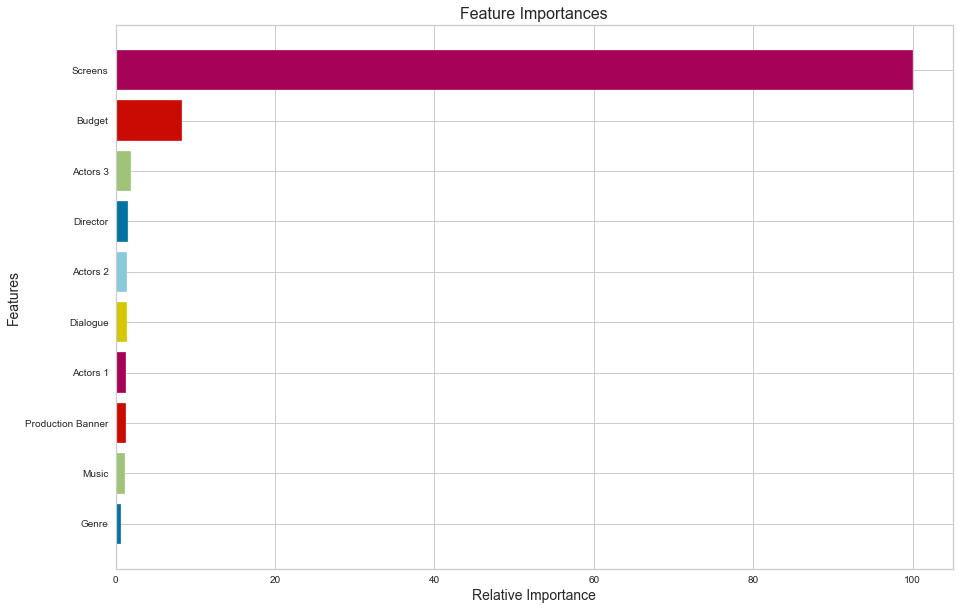

In [52]:
figure = plt.figure(figsize = (15,10))
viz = FeatureImportances(selector.estimator, relative=True)
viz.fit(Xle,y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title('Feature Importances', size = 16);

It seems that the final predicted First Day depends largely on the deployment of the movie across as many screens as possible, with the budget playing somewhat of a role.  The actual ingredients of the movie seemingly play little to no role in determining the First Day box office collections.

This leads me to believe that there may be issues with the encoding process which may have led to this conclusion.  Attempting another process to encode the high cardinality categorical variables.

In [53]:
#using target encoding to transform data    

In [54]:
from category_encoders import *

ce = BinaryEncoder()
Xce = ce.fit_transform(X)
Xce

,Actors 1_0,Actors 1_1,Actors 1_2,Actors 1_3,Actors 1_4,Actors 1_5,Actors 1_6,Actors 1_7,Actors 1_8,Actors 1_9,Actors 1_10,Actors 2_0,Actors 2_1,Actors 2_2,Actors 2_3,Actors 2_4,Actors 2_5,Actors 2_6,Actors 2_7,Actors 2_8,Actors 2_9,Actors 2_10,Actors 3_0,Actors 3_1,Actors 3_2,Actors 3_3,Actors 3_4,Actors 3_5,Actors 3_6,Actors 3_7,Actors 3_8,Actors 3_9,Actors 3_10,Budget,Dialogue_0,Dialogue_1,Dialogue_2,Dialogue_3,Dialogue_4,Dialogue_5,Dialogue_6,Dialogue_7,Dialogue_8,Dialogue_9,Dialogue_10,Dialogue_11,Director_0,Director_1,Director_2,Director_3,Director_4,Director_5,Director_6,Director_7,Director_8,Director_9,Director_10,Director_11,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Music_0,Music_1,Music_2,Music_3,Music_4,Music_5,Music_6,Music_7,Music_8,Music_9,Music_10,Production Banner_0,Production Banner_1,Production Banner_2,Production Banner_3,Production Banner_4,Production Banner_5,Production Banner_6,Production Banner_7,Production Banner_8,Production Banner_9,Production Banner_10,Production Banner_11,Screens
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,710000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2600
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,100000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,675
3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,720000000,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,2650
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,410000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2050
5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,500000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,0,1,0,0,1,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,1,1700000000,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1600
3947,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,290000000,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,1,2000
3948,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,540000000,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,2100
3949,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,340000000,0,0,1,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1250


In [55]:
#identify important columns using methodology above

#predict using Xce and identify error levels - copy from above.

total features selected are:  2
Threshold set by model: 0.01
Features:  ['Budget', 'Screens']


E:\Data_Science\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


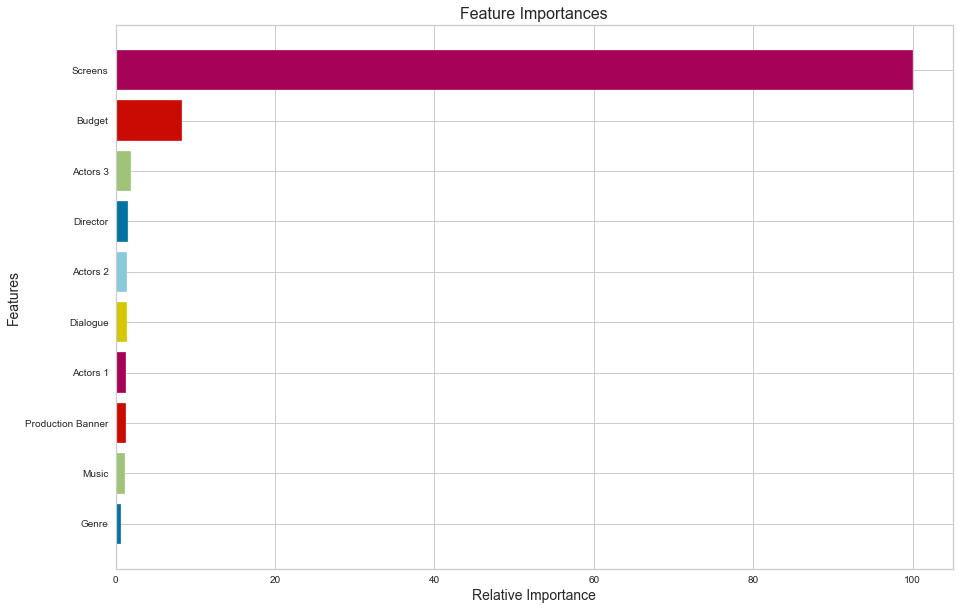

In [56]:
#running selector from model
selector=SelectFromModel(RandomForestRegressor(n_estimators= 100, random_state = 42, n_jobs= -1))
selector.fit(Xce,y)

#selected features
selected_features = Xce.columns[(selector.get_support())].tolist()
print('total features selected are: ', len(selected_features))

print('Threshold set by model:', np.round(selector.threshold_, decimals = 2))
print('Features: ', selected_features)


figure = plt.figure(figsize = (15,10))
viz = FeatureImportances(selector.estimator, relative=True)
viz.fit(Xle,y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title('Feature Importances', size = 16);

When using category encoder the threshold decreases and now recommends two columns including 'Screens' & 'Budget'.

<a id = Section8></a>
### **8. Conclusion & Way Forward**

Inputs:
- Ora has a predictor  (consider options)
- Can be sold to producers and distributors
- Interesting - use ths for predicting TRPs...for movie to sell - Guiding the producer to the right selling price
- OTT is a black box - groupM ESP - Entertainment and Sports - Evaluator determine value of sports content

Actors for prices to be taken. Comscore- box office data - rentrack-archival data.

Run more dummy tests.
